<div>
  <p>Scan this code or go to the URL below to pull up this notebook in Google Colab.</p>
  <img src="qrcode.png" alt="QR code link for this website">
  <p><a href="https://bit.ly/3ogwz1s">https://bit.ly/3ogwz1s</a></p>
  <p></p>
</div>

<a target="_blank" href="https://colab.research.google.com/github/IU-Atmospheric-Sciences-Group/forecast_map_demo/blob/main/Forecast%20Map%20Demo.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Forecast Map Demo
This [Notebook](https://jupyterlab.readthedocs.io/en/stable/user/notebook.html) demonstrate a simple method for plotting forecast data.

**Objective**:

* Generate custom, up-to-date weather forecast maps of:
    * current satellite imagery
    * forecasts of 500 mb heights
    * mixtures of these
    * forecasts of surface temperatures

**Who is this for?**

Weather enthusiasts, atmospheric science students, etc. interested in making custom, up-to-date weather forecast maps.

**What do I need to know in advance?**

Nothing, really--this is intended to be a self-contained lesson.  Some basic understanding of weather concepts would be useful for interpreting some of the maps, but that's not really necessary.  

**If I don't know anything about programming, how is this possible?**

This lesson takes advantage of some nicely-written code from [Brian Baylock](https://github.com/blaylockbk): [Goes2Go](https://goes2go.readthedocs.io/en/latest/?badge=latest) and [Herbie](https://herbie.readthedocs.io/en/stable/?badge=latest) that dramatically simplifies the process of obtaining and using satellite images and forecast data.

That, and the accompanying video walks through the basic programming concepts needed to generate and customize the maps.

## How should I get started on this lesson?
If you're seeing this notebook as part of a live lesson, follow along there!  Otherwise, check out the video recording below, which covers the same content as the live lesson would:

TBD (the video will be uploaded at a later time)

**Note:** this notebook was assembled on April 16, 2023 -- if you're seeing this much later than that time, its possible that updates to the various libraries below may break some of the code in here.



In [1]:
""" import libraries into the notebook so we can use them """

# ******************************************************************************
# NOTE: the following code is overly complicated because we are using Google 
# Colab, which does not have herbie, goes2go, cartopy, or cmocean installed
# I've added everything below to auto-install them when needed.
# Ordinarily, you'd just have to do the following to load them once installed:
# ******************************************************************************
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False


if IN_COLAB:
  try:
    import herbie # library for making forecasts
  except:
    # install herbie if it isn't already installed
    # force re-installation of shapely, otherwise cartopy breaks in google colab
    ! pip install --upgrade pip
    ! pip uninstall shapely --yes
    ! pip install --no-binary shapely cartopy
    # override google colab's timezone; this is a workaround for a bug in 
    # herbie that occurs when the system timezone is UTC.
    !ln -sf /usr/share/zoneinfo/US/Eastern /etc/localtime
    # also install the eccodes library (assuming we are on Google Colab)
    ! apt-get install libeccodes-dev
    # install herbie
    ! pip install herbie-data
  
  try:
    import goes2go # library for downloading GOES data
  except:
    # install goes2go if it isn't already installed
    !pip install goes2go
  
  try:
    import cmocean # for nice colormaps
  except:
    !pip install cmocean
# ******************************************************************************
# ********** End code specific to Google Colab *********************************
# ******************************************************************************
  
  
import matplotlib as mpl # part of the plotting library
import matplotlib.pyplot as plt # part of the plotting library
import datetime as dt # for manipulating dates
import herbie  # for downloading and plotting forecast data
import goes2go # for downloading GOES data
import cmocean # for nice colormaps
import cartopy # library for making maps
import pandas as pd # for manipulating dates and times (it does much much more, but that's all we need it for here)
import datetime as dt # also for manipulating dates and times

# NOTE: when you want to "run" the code in this cell, or any of the cells below, click on it and then press the "play" button in the toolbar above...or press Shift+Enter on your keyboard

# once this cell executes, the area just below the cell will show the message "Success: libraries imported." at the very end (or whatever text is in the `print()` function)
# if you're running this in Google Colab, you'll see a lot of output the first time this cell runs!
print("Success: libraries imported.")

Success: libraries imported.


## Objective 1: Plot GOES satellite data on a map

Assuming the cell above ran correctly, we can move on to the next cell. If you simply run the next cell, it should execute all the code written there and produce a satellite image.

There's a lot of code there, but that's because I've combined multiple steps into one cell:
* Downloading the satellite data
* Creating figure on which to plot data
* Plotting the data on the figure
* Showing and/or saving the data

One thing to point out is that there are two types of text in these cells: comment text and code text.  Comment text doesn't actually do anything--it's just meant to help a reader understand the code.  Comment text shows up as one of two things:

```python
""" This is a comment in triple-quotes.  I often use this to say what the cell is meant to do. """

# this is a traditional comment; anything that comes after the # symbol on a given line counts as a comment
```

If you read the comments carefully in this notebook, you'll see that there are places where I prompt you to make changes to customize the code.  But really, you should feel free to try to modify the code in any way. There's nothing you can do that will harm anything!

📦 Finished downloading [1] files to [/home/obrienta/data/noaa-goes16/ABI-L2-MCMIPC].
📚 Finished reading [1] files into xarray.Dataset.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

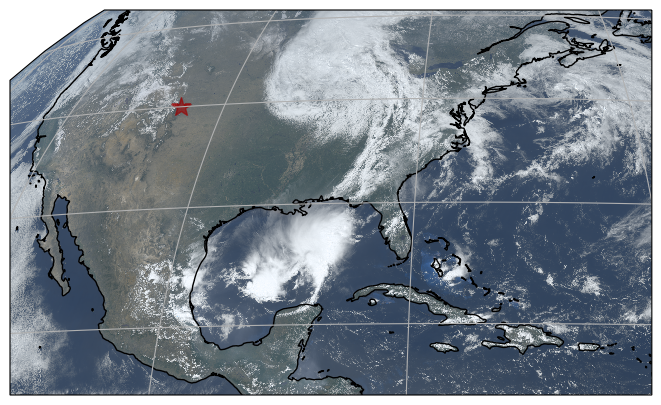

In [2]:
""" Objective 1: Plot GOES satellite data on a map. """

# ***************************
# Step 1: Download GOES data
# ***************************

# Download the GOES-East visible satellite data
G = goes2go.goes_latest(satellite = "EAST", product='ABI')


# **************************
# Step 2: Generate a figure
# **************************

# Make figure that uses the same map projection as the GOES data
# The plot's size is 10 inches wide by 5 inches tall
fig, ax = plt.subplots(
    figsize = (10, 5),
    subplot_kw = dict(projection=G.rgb.crs),
    )

# ***************************
# Step 3: Plot the GOES data
# ***************************

# plot the GOES data on the map
ax.imshow(G.rgb.TrueColor(), **G.rgb.imshow_kwargs)

# **************************
# Step 4: Annotate the plot
# **************************

# draw coastlines
ax.coastlines()

# draw gridlines
ax.gridlines()

# add a star at a specified location on the map
# Question: can you modify this code to add a star at your location?
my_lat = 40.0 # degrees north
my_lon = -105.0 # degrees west
iu_crimson = "#99000099" # color of the star (semi-transparent IU crimson)
ax.plot(my_lon, my_lat, marker='*', color=iu_crimson, markersize=15, transform=cartopy.crs.PlateCarree())

# ******************************************
# Step 5: Show the plot (and maybe save it) 
# ******************************************

# save the figure to a file
# Question: can you modify this code to save the figure to a file?
#plt.savefig("GOES_EAST_TrueColor.png")

# show the plot
plt.show()

If the above cell ran correctly, you should have a nice looking image showing the most recent satellite data.  You can always re-run the code in that cell to get the most up-to-date satellite data. There are also ways to access past satellite data too!

## Objective 2: Plot the most recent 500 mb forecast from the HRRR model

We'll use data from the High Resolution Rapid Refresh (HRRR) model, which produces forecasts over the continental United States.  For the next plot, we'll simply plot the most recent 'analysis', which is the model's best estimate of the current state of the atmosphere.  This corresponds to a forecast lead time (`forecast_hour` in the cell below) of 0.  But this could easily be changed.

✅ Found ┊ model=hrrr ┊ product=prs ┊ 2023-Apr-16 14:38 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


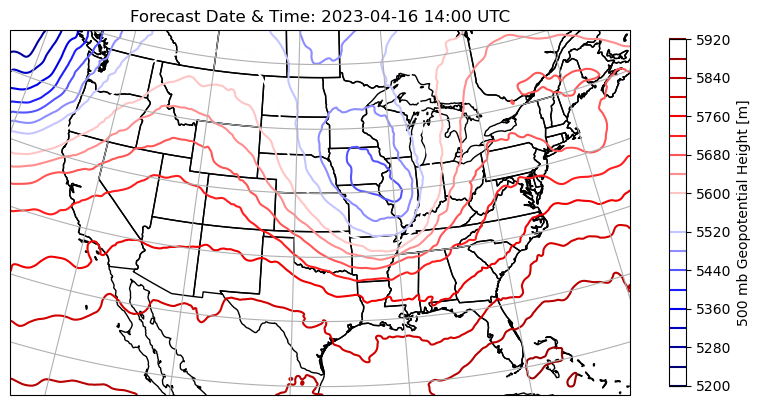

In [3]:
""" Objective 2: Plot the most recent 500 mb forecast from the HRRR model. """

# ***********************************
# Step 1: Download the forecast data
# ***********************************
model = "hrrr" # the model to use; "hrrr" = High Resolution Rapid Refresh model; see https://herbie.readthedocs.io/en/stable/user_guide/_model_notebooks/index.html for more
forecast_init_date = "today" # the date that the forecast model starts; enter a date in the format "YYYY-MM-DD" to specify something other than the most recent forecast
forecast_hour = 0 # the forecast hour (0 = the most recent forecast; 3 = the forecast 3 hours from now; 6 = the forecast 6 hours from now; etc.)
product = "prs" # the type of forecast data to download; "prs" = pressure level data; "sfc" = surface data
H = herbie.Herbie(
    date = forecast_init_date,
    fxx = forecast_hour,
    model=model,
    product=product,
    )


# ************************************************
# Step 2: Extract the variable(s) we want to plot
# ************************************************
# get the 500 mb height data
Z500 = H.xarray("HGT:500 mb:") # the "HGT:" means "geopotential height"; the ":500 mb:" means "all variables at 500 mb"

# Question: can you modify this code to get the 850 mb data instead of the 500 mb data?

# **************************
# Step 3: Generate a figure
# **************************
projection = Z500.herbie.crs # the map projection to use; this is the same projection as the forecast data, but it could be another projection (e.g., cartopy.crs.PlateCarree())
fig, ax = plt.subplots(
    figsize = (10, 5),
    subplot_kw = dict(projection = projection),
)

# *******************************
# Step 4: Plot the forecast data
# *******************************
# plot the variable "gh" (geopotential height) on the map
# using a blue-red colormap ("seismic"), 20 levels,
# and the same projection as the forecast data.
cplt = ax.contour(
    Z500.longitude,
    Z500.latitude,
    Z500.gh,
    cmap = "seismic",
    levels = 20,
    transform = cartopy.crs.PlateCarree(),
)

# **************************
# Step 5: Annotate the plot
# **************************
# add coastlines and states
ax.add_feature(cartopy.feature.STATES)
ax.coastlines()

# add grid lines, but only label the left and bottom ones
gl = ax.gridlines()

# add a title giving the valid date and time of the forecast
forecast_date = pd.to_datetime(Z500.valid_time.values).strftime("%Y-%m-%d %H:%M UTC")
ax.set_title(f"Forecast Date & Time: {forecast_date}")

# add a colorbar
fig.colorbar(cplt, ax=ax, shrink=0.9, label = "500 mb Geopotential Height [m]")



# ******************************************
# Step 6: Show the plot (and maybe save it)
# ******************************************
# save the figure to a file
# plt.savefig("HRRR_500mb_geopotential_height.png")

# show the plot
plt.show()



If the cell above ran correctly, you should see a map of the US, with red and blue lines indicating the current 500 mb heights.

## Objective 3: Mix and match GOES and HRRR data

Now that we've downloaded both the HRRR and GOES satellite, data, we can plot them both in the same map without having to re-download data!

The way this works is that we will utilize the 'map projection' from the satellite data for the underlying map, and then `matplotlib` and `cartopy` will warp (transform is the proper word) the HRRR forecast data to properly fit on the map.  I literally created the code below by copy-pasting chunks of code from above (and updating the comments).  You can do the same to generate custom plots!

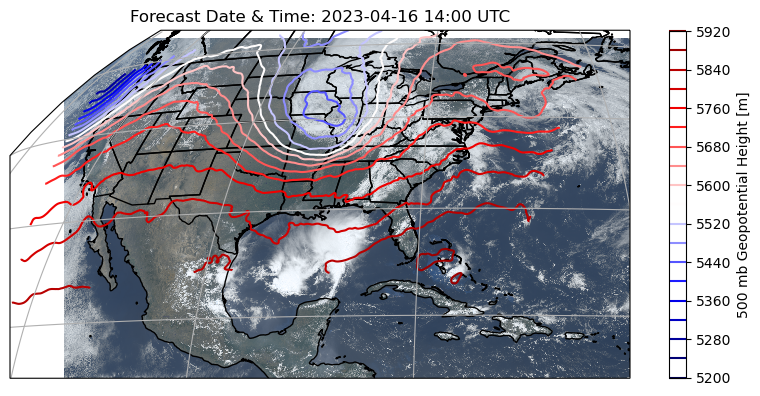

In [4]:
""" Objective 3: Mix and match GOES and HRRR data. """

# *************************
# Step 1: Create a figure
# *************************
fig, ax = plt.subplots(
    figsize = (10, 5),
    subplot_kw=dict(projection=G.rgb.crs),
)

# ************************************
# Step 2: Plot the GOES and HRRR data
# ************************************

# plot the GOES data on the map
ax.imshow(G.rgb.TrueColor(), **G.rgb.imshow_kwargs)

# plot the HRRR 500 mb geopotential height data on the map
cplt = ax.contour(
    Z500.longitude,
    Z500.latitude,
    Z500.gh,
    cmap = "seismic",
    levels = 20,
    transform = cartopy.crs.PlateCarree(),
)

# **************************
# Step 5: Annotate the plot
# **************************
# add coastlines and states
ax.add_feature(cartopy.feature.STATES)
ax.coastlines()

# add grid lines, but only label the left and bottom ones
gl = ax.gridlines()

# add a title giving the valid date and time of the forecast
forecast_date = pd.to_datetime(Z500.valid_time.values).strftime("%Y-%m-%d %H:%M UTC")
ax.set_title(f"Forecast Date & Time: {forecast_date}")

# add a colorbar
fig.colorbar(cplt, ax=ax, shrink=0.9, label = "500 mb Geopotential Height [m]")

# ******************************************
# Step 6: Show the plot (and maybe save it)
# ******************************************
# save the figure to a file
# plt.savefig("HRRR_and_GOES.png")

# show the plot
plt.show()


    If the above worked, you should have a map with satellite imagery underneath 500 mb height contours.  It won't look perfect because the two datasets don't cover exactly the same geographic areas.  There is a function called `set_extent` that allows a person to customize the corners of the map that's drawn.  For example, the following code snippet would set the lower left corner of the plot to (120 °W, 20 °N) and the upper right corner to (70 °W, 55 °N):

```python
# set the bounds of the map
ax.set_extent([-120, -70, 20, 55], crs=cartopy.crs.PlateCarree())
```

Can you update the plot above to avoid plotting the parts of the map where the satellite data and HRRR data don't overlap?

## Objective 4: Plot a surface temperature forecast

In this last part of the demo, we'll plot a forecast map of surface temperature 2 days into the future.

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Apr-16 00:00 UTC F48 ┊ GRIB2 @ aws ┊ IDX @ aws


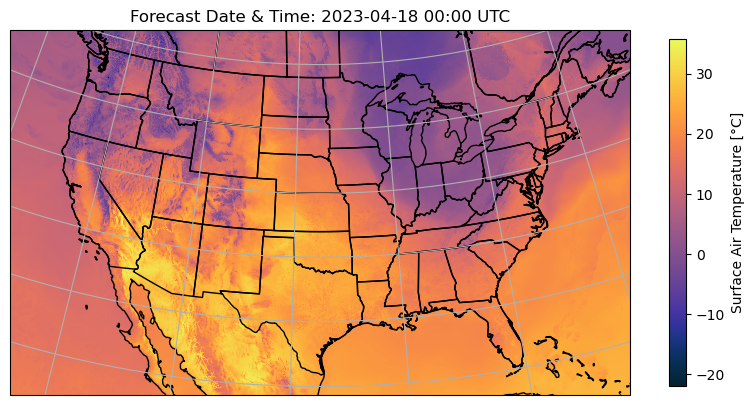

In [5]:
""" Objective 4: Plot a 2-day of surface temperature from the HRRR model. """

# ***********************************
# Step 1: Download the forecast data
# ***********************************
model = "hrrr" # the model to use; "hrrr" = High Resolution Rapid Refresh model; see https://herbie.readthedocs.io/en/stable/user_guide/_model_notebooks/index.html for more
forecast_init_date = dt.datetime.today() # the date that the forecast model starts
forecast_hour = 2 * 24 # two days (48 hours) into the future
product = "sfc" # the type of forecast data to download; "prs" = pressure level data; "sfc" = surface data
H = herbie.Herbie(
    date = forecast_init_date.strftime("%Y-%m-%d 00"),
    fxx = forecast_hour,
    model=model,
    product=product,
    )


# ************************************************
# Step 2: Extract the variable(s) we want to plot
# ************************************************
# get the near-surface temperature (the temperature that an anemometer would measure if it were 2 meters above the ground)
t2m = H.xarray("TMP:2 m above") 


# **************************
# Step 3: Generate a figure
# **************************
projection = t2m.herbie.crs # the map projection to use; this is the same projection as the forecast data, but it could be another projection (e.g., cartopy.crs.PlateCarree())
fig, ax = plt.subplots(
    figsize = (10, 5),
    subplot_kw = dict(projection = projection),
)

# *******************************
# Step 4: Plot the forecast data
# *******************************
# plot the variable "gh" (geopotential height) on the map
# using a blue-red colormap ("seismic"), 20 levels,
# and the same projection as the forecast data.

# convert to celsius for plotting
t2m_c = t2m.t2m - 273.15 # convert from Kelvin to Celsius
# Question: can you convert from Kelvin to Fahrenheit?

# make the plot (in celsius)
cplt = ax.pcolormesh(
    t2m.longitude,
    t2m.latitude,
    t2m_c,
    cmap = cmocean.cm.thermal,
    transform = cartopy.crs.PlateCarree(),
)

# **************************
# Step 5: Annotate the plot
# **************************
# add coastlines and states
ax.add_feature(cartopy.feature.STATES)
ax.coastlines()

# add grid lines, but only label the left and bottom ones
gl = ax.gridlines()

# add a title giving the valid date and time of the forecast
forecast_date = pd.to_datetime(t2m.valid_time.values).strftime("%Y-%m-%d %H:%M UTC")
ax.set_title(f"Forecast Date & Time: {forecast_date}")

# add a colorbar
fig.colorbar(cplt, ax=ax, shrink=0.9, label = "Surface Air Temperature [°C]")



# ******************************************
# Step 6: Show the plot (and maybe save it)
# ******************************************
# save the figure to a file
# plt.savefig("HRRR_2_day_surface_temperature.png")

# show the plot
plt.show()

## Beyond this demonstration

There's much more you can do with making forecast maps: many more variables, different regions, different projections, making multipanel plots, overlaying lots of data, etc.!

* learn more about the GOES data (including how to get lightning strikes on a map!) at [the goes2go documentation page](https://blaylockbk.github.io/goes2go/_build/html/).
* learn more about the `herbie` package (including other forecast models available) at [the herbie documentation page](https://herbie.readthedocs.io/en/stable/index.html)
* learn more about `cartopy` mapping possibilities: [cartopy documentation](https://scitools.org.uk/cartopy/docs/latest/index.html)
* learn more about `matplotlib`'s general plotting capabilities: [matplotlib documentation](https://matplotlib.org/)
* learn more about python in general, and how it might be used in the sciences: [An Introduction to Python Programming for Scientists and Engineers](https://www.cambridge.org/highereducation/books/an-introduction-to-python-programming-for-scientists-and-engineers/271C02A02E8B775066316E92A68E187A#overview) (also, there are a ton of free resources on the internet!)